# Exploratory Analysis and Machine Learning on factors affecting review scores.

In this part, we use a Machine Learning algorithm, 'Random Forest' to determine which factors have the most significant effect on the review scores.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('processed_data.csv')
data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  payment_sequential payment_type  ...   price  \
0           2017-10-18 00:00:00                   1  credit_card  ...   29.99   
1           2018-08-13 00:00:00                   1       boleto  ...  118.70   
2           2018-09-04 00:00:00                   1  credit_card  ...  159.90   
3           2017-12-15 00:00:00                   1  credit_card  ...   45.00   
4           2018-02-26 00:00:00                   1  credit_card  ...   19.90   

   freight_value  product_category_name  product_name_lenght  \
0           8.72  utilidades_domesticas                 40.0   
1          22.76             perfumaria                 29.0   
2          19.22             automotivo                 46.0   
3          27.20               pet_shop                 59.0   
4           8.72              papelaria                 38.0   

  product_description_lenght product_photos_qty product_weight_g  \
0                      268.0                4.0            500.0   
1                      178.0                1.0            400.0   
2                      232.0                1.0            420.0   
3                      468.0                3.0            450.0   
4                      316.0                4.0            250.0   

   product_length_cm product_height_cm product_width_cm  
0               19.0               8.0             13.0  
1               19.0              13.0             19.0  
2               24.0              19.0             21.0  
3               30.0              10.0             20.0  
4               51.0              15.0             15.0  

[5 rows x 36 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95978 entries, 0 to 95977
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       95978 non-null  object 
 1   customer_id                    95978 non-null  object 
 2   order_status                   95978 non-null  object 
 3   order_purchase_timestamp       95978 non-null  object 
 4   order_approved_at              95978 non-null  object 
 5   order_delivered_carrier_date   95978 non-null  object 
 6   order_delivered_customer_date  95978 non-null  object 
 7   order_estimated_delivery_date  95978 non-null  object 
 8   payment_sequential             95978 non-null  int64  
 9   payment_type                   95978 non-null  object 
 10  payment_installments           95978 non-null  int64  
 11  payment_value                  95978 non-null  float64
 12  customer_unique_id             95978 non-null 

## 1. Customer behaviour

### 1. Total turnover of Olist

In [4]:
totalPrice=data['price'].sum()
print('Total product turnover is',totalPrice,'Brazilian Reals')

totalProducts=data['product_id'].count()
print('Total volume ',totalProducts,'items ')

Total product turnover is 13163019.160000004 Brazilian Reals
Total volume  95978 items 


### 2. Trend in monthly trade volume 

In [5]:
monthProducts=data.groupby(pd.to_datetime(data['order_purchase_timestamp']).apply(lambda x:x.month))['product_id'].count()
print('Monthly trade volume is：\n',monthProducts)

Monthly trade volume is：
 order_purchase_timestamp
1      7770
2      8118
3      9503
4      9077
5     10260
6      9195
7      9973
8     10491
9      4125
10     4729
11     7248
12     5489
Name: product_id, dtype: int64


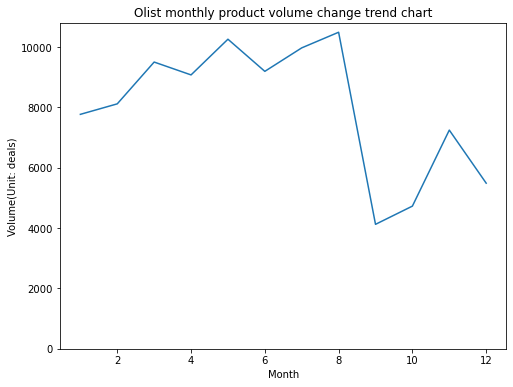

In [6]:
monthproducts_Fig,ax=plt.subplots(figsize=(8,6))
monthproducts_LineChart=plt.plot(monthProducts)
plt.title('Olist monthly product volume change trend chart')
ax.set_ylim(bottom=0)
plt.ylabel('Volume(Unit: deals)')
plt.xlabel("Month")
plt.show()

From the monthly volume of products, August is the month with most orders, with 10,491 pieces; followed by May, with 10,260 pieces; the least order month is September, with 4,125 pieces.

In [7]:
hourProducts=data.groupby(pd.to_datetime(data['order_purchase_timestamp']).apply(lambda x:x.hour))['product_id'].count()
print('Hourly trade volume is：\n',hourProducts)

Hourly trade volume is：
 order_purchase_timestamp
0     2305
1     1125
2      493
3      257
4      202
5      182
6      474
7     1195
8     2885
9     4622
10    5941
11    6360
12    5772
13    6273
14    6345
15    6215
16    6449
17    5932
18    5560
19    5776
20    5980
21    6020
22    5626
23    3989
Name: product_id, dtype: int64


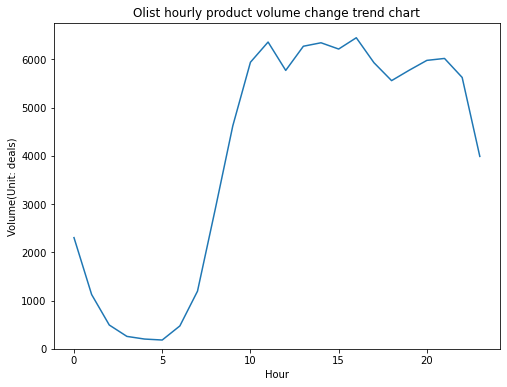

In [8]:
hourproducts_Fig,ax=plt.subplots(figsize=(8,6))
hourproducts_LineChart=plt.plot(hourProducts)
plt.title('Olist hourly product volume change trend chart')
ax.set_ylim(bottom=0)
plt.ylabel('Volume(Unit: deals)')
plt.xlabel("Hour")
plt.show()

The most sales are mainly concentrated at 10\~17 o'clock, while 18\~22 o'clock is the next highest sales volume, while 12 o'clock and 18 o'clock have a small flucuatuation, probably because consumers are taking a lunch break or eating dinner.

In [9]:
dayProducts=data.groupby(pd.to_datetime(data['order_purchase_timestamp']).apply(lambda x:x.dayofweek))['product_id'].count()
dayProducts = pd.DataFrame(dayProducts)
dayProducts = dayProducts.reset_index()
def convert(x):
    if x==0:
        return 'Monday'
    elif x==1:
        return 'Tuesday'
    elif x==2:
        return 'Wednesday'
    elif x==3:
        return 'Thursday'
    elif x==4:
        return 'Friday'
    elif x==5:
        return 'Saturday'
    elif x==6:
        return 'Sunday'
dayProducts['order_purchase_timestamp'] = dayProducts['order_purchase_timestamp'].apply(convert)
dayProducts.set_index('order_purchase_timestamp',inplace=True)
#dayProducts.rename(index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
print('Monthly trade volume is：\n',dayProducts)

Monthly trade volume is：
                           product_id
order_purchase_timestamp            
Monday                         15623
Tuesday                        15432
Wednesday                      14994
Thursday                       14253
Friday                         13614
Saturday                       10487
Sunday                         11575


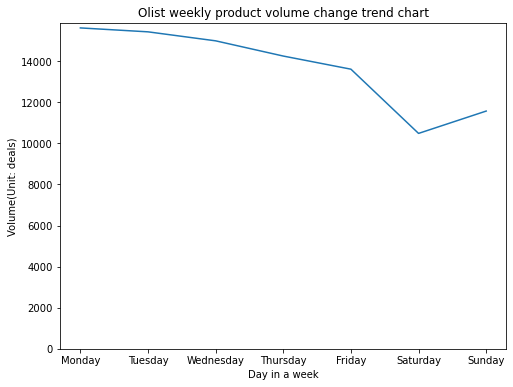

In [10]:
dayproducts_Fig,ax=plt.subplots(figsize=(8,6))
dayproducts_LineChart=plt.plot(dayProducts)
plt.title('Olist weekly product volume change trend chart')
ax.set_ylim(bottom=0)
plt.ylabel('Volume(Unit: deals)')
plt.xlabel("Day in a week")
plt.show()

From the above chart, we can find that the sales volume on weekdays (Mon, Tues, Wed, Thur) is obviously higher than the sales volume on holidays (Fri, Sat, Sun), which is also in line with the general e-commerce sales situation: consumers may use their commute, leisure time at work and class, stay at home after work to slide their mobile phones or shop online on weekdays. While on weekends, they may go out for a walk or engage in leisure activities, so they have less time to slide their mobile phones compared to weekdays. Therefore, the sales volume is mainly concentrated on weekdays.

In [11]:
days = pd.to_datetime(data['order_purchase_timestamp']).apply(lambda x:x.dayofweek)
hours = pd.to_datetime(data['order_purchase_timestamp']).apply(lambda x:x.hour)
tgt = pd.concat([days, hours], axis = 1)
tgt.head()

order_purchase_timestamp  order_purchase_timestamp
0                         0                        10
1                         1                        20
2                         2                         8
3                         5                        19
4                         1                        21

In [12]:
info_time=[[0 for i in range(24)] for j in range(7)]

for i in range(tgt.shape[0]):
    info_time[tgt.iloc[i,0]][tgt.iloc[i,1]]+=1

In [13]:
info_time = pd.DataFrame(info_time)
info_time

0    1   2   3   4   5   6    7    8    9   ...    14    15    16   17  \
0  312  131  63  33  21  22  64  157  468  747  ...  1054  1039  1057  950   
1  299  149  79  28  28  24  68  216  507  840  ...  1091  1003  1055  939   
2  384  170  81  31  32  24  89  206  492  796  ...  1021   945  1003  938   
3  341  165  73  38  30  28  82  210  491  734  ...   947   897  1036  878   
4  408  210  66  46  39  35  91  203  482  749  ...   933   945   938  787   
5  306  165  64  41  25  23  50  102  245  419  ...   643   694   674  667   
6  255  135  67  40  27  26  30  101  200  337  ...   656   692   686  773   

    18   19   20    21   22   23  
0  885  916  995  1080  957  691  
1  850  891  939   992  936  671  
2  815  817  876   924  852  596  
3  758  795  814   825  827  529  
4  694  755  712   697  672  492  
5  687  726  705   642  532  420  
6  871  876  939   860  850  590  

[7 rows x 24 columns]

[Text(0.5, 60.0, 'Hour in a day'), Text(141.0, 0.5, 'Day in a week')]

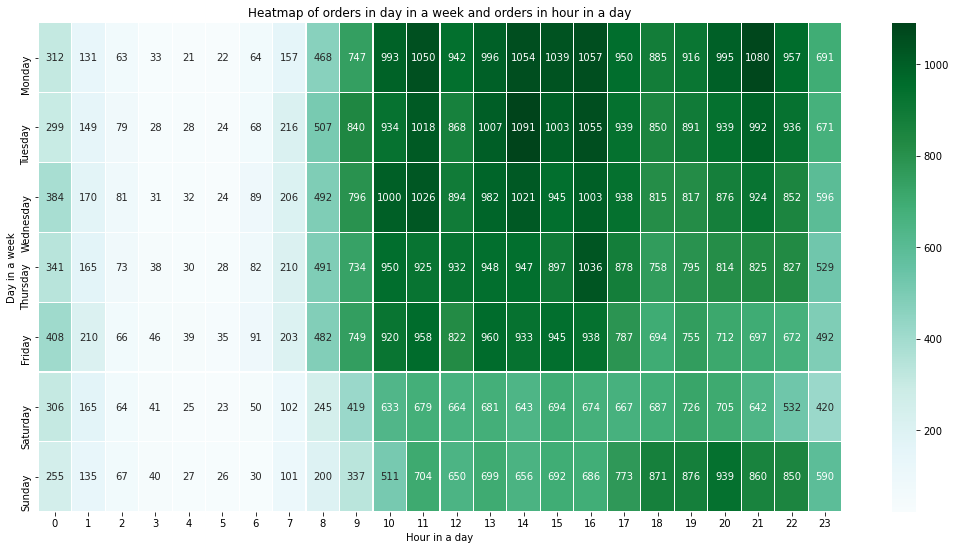

In [14]:
plt.figure(figsize=(18, 9))
plt.title('Heatmap of orders in day in a week and orders in hour in a day')
ax = sb.heatmap(info_time, yticklabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], 
                linewidths=.1,annot =True, fmt=".0f",cmap = "BuGn")
ax.set(xlabel="Hour in a day", ylabel = "Day in a week")

From the heat map, we can find that the highest sales volume is at 1100-1700 on Tuesday, and then we can observe that the afternoon sessions from Monday to Wednesday are the time with the highest sales volume, while there is a significant difference between the afternoon sessions of 6 days and the other 5 days. It may be that among the customer popluations, students or office workers are not as much as housewives who are free in the afternoon. This can be verified if we can get more detailed information about the consumers (e.g., occupation, age), but unfortunately there is no detailed information about the members in this data.

### 3. Number of items per purchase

Countplot on number of items per purchase.

[Text(0.5, 0, 'Number of items'), Text(0, 0.5, 'Counts')]

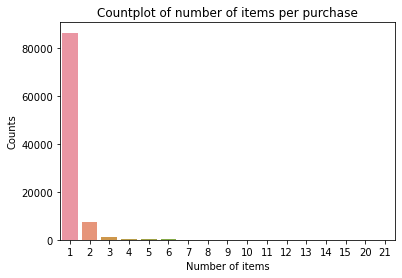

In [15]:
plt.title('Countplot of number of items per purchase')
ax = sb.countplot(x='order_item_id', data=data)
ax.set(xlabel="Number of items", ylabel = "Counts")

In [16]:
print("One product purchase percentage: {:.2f}%".format(100*data[data['order_item_id']==1].shape[0]/data.shape[0]))

One product purchase percentage: 90.02%


From the above chart, we can see that 90% of the orders are for one product only, so we can deduce that the main products sold on Olist are those that are not bought in large quantities at one time or at high unit prices (e.g. cell phones, computers, furniture).

### 4. Order payment values

Histogram on average payment value, inclusive of delivery fee/freight.1

We chose to discard outliers for a better representation.

C:\Users\Juan Samuel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Payment values'), Text(0, 0.5, 'Counts')]

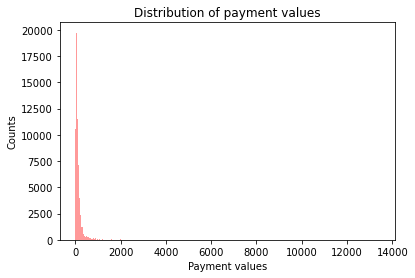

In [17]:
plt.title('Distribution of payment values')
ax = sb.distplot(data['price'],kde=False,bins=500,color='r')
ax.set(xlabel="Payment values", ylabel = "Counts")

In [18]:
data['price'].describe()

count    95978.000000
mean       137.146212
std        209.188835
min          0.850000
25%         45.900000
50%         86.800000
75%        149.900000
max      13440.000000
Name: price, dtype: float64

In [19]:
print('The median price is {:.2f}'.format((np.median(data['price']))))
print('The mean price is {:.2f}'.format((np.mean(data['price']))))

The median price is 86.80
The mean price is 137.15


The distribution is obviously affected by the extreme large values, so we apply logarithmic function on total price.

In [20]:
import math
def log_10(x):
    return math.log(x)/math.log(10)
logged_price = data['price'].apply(log_10)

Text(0.5, 1.0, 'Payment values(Logarithmic Scale)')

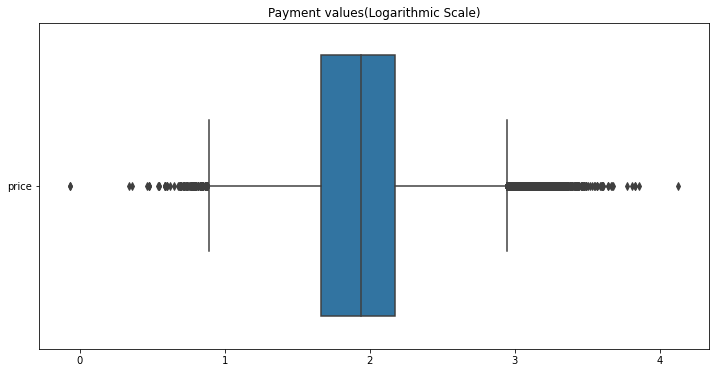

In [21]:
f, axes = plt.subplots(1,1, figsize=(12, 6))

ax = sb.boxplot(data=pd.DataFrame(logged_price), orient='h')
plt.title('Payment values(Logarithmic Scale)')

C:\Users\Juan Samuel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Payment values(Logarithmic Scale)'), Text(0, 0.5, 'Counts')]

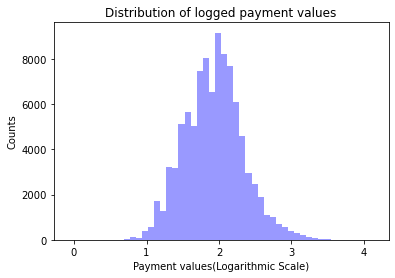

In [22]:
plt.title('Distribution of logged payment values')
ax = sb.distplot(logged_price,kde=False,color='b')
ax.set(xlabel="Payment values(Logarithmic Scale)", ylabel = "Counts")

In [23]:
print(np.quantile(logged_price, 0.25))  # Q1
print(np.quantile(logged_price, 0.5)  )# median
print(np.quantile(logged_price, 0.75) ) # Q2
print("Lower quartile of price (after log transformation): R${:.2f}".format(10**np.quantile(logged_price, 0.25)))
print("Median quartile of price (after log transformation): R${:.2f}".format(10**np.quantile(logged_price, 0.5)))
print("Upper quartile of price (after log transformation): R${:.2f}".format(10**np.quantile(logged_price, 0.75)))

1.661812685537261
1.9385197251764918
2.175801632848279
Lower quartile of price (after log transformation): R$45.90
Median quartile of price (after log transformation): R$86.80
Upper quartile of price (after log transformation): R$149.90


After log transformation, we have a much nicer distribution. The distribution of total spend is slightly skewed to the right by the extreme values. The median spend per order is R\\$86.80, and the total spending for all orders is roughly concentrated between R$46 and R\\$150, with few orders having a total spend of less than R\\$10 or more than R\\$1,000.

### 5. Freight value (Delivery charges)

A freight cost (historically and in ship chartering simply freight) is a price at which a certain cargo is delivered from one point to another. The price depends on the form of the cargo, the mode of transport (truck, ship, train, aircraft), the weight of the cargo, and the distance to the delivery destination.

[Text(0.5, 0, 'Freight values'), Text(0, 0.5, 'Counts')]

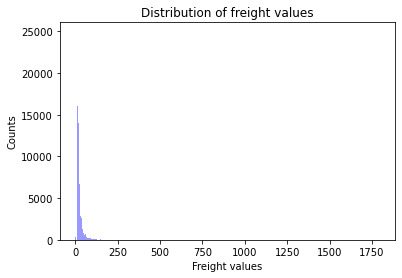

In [24]:
plt.title('Distribution of freight values')
ax = sb.distplot(data['freight_value'],kde=False,bins= 500, color ='b')
ax.set(xlabel="Freight values", ylabel = "Counts")
#There are a few outliers that affect the overall distribution.

In [25]:
data['freight_value'].describe()

count    95978.000000
mean        22.788076
std         21.584321
min          0.000000
25%         13.850000
50%         17.180000
75%         24.010000
max       1794.960000
Name: freight_value, dtype: float64

We can also observed from the mean(22.788) and median(17.180) that the freight value is skewed towards the right by some extremely high freights.

In [26]:
data[data['freight_value']==0].shape[0]

336

We do a logarithmic function on freight value and remove all the zero freight values that may affect the distribution as they hinders the logarithmic function to be applied as well. And these will only marginally affect the distribution as only 336 out of 95978 orders have 0 freight value.

In [27]:
import math
def log_10(x):
    return math.log(x)/math.log(10)
data_nz = data[data['freight_value']!=0]
logged_freight = data_nz['freight_value'].apply(log_10)

count    95642.000000
mean         1.276426
std          0.240298
min          0.755875
25%          1.143639
50%          1.236033
75%          1.381837
max          3.254055
Name: freight_value, dtype: float64
Lower quartile of price (after log transformation): R$13.92
Median quartile of price (after log transformation): R$17.22
Upper quartile of price (after log transformation): R$24.09


C:\Users\Juan Samuel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Freight values(Logarithmic Scale)')

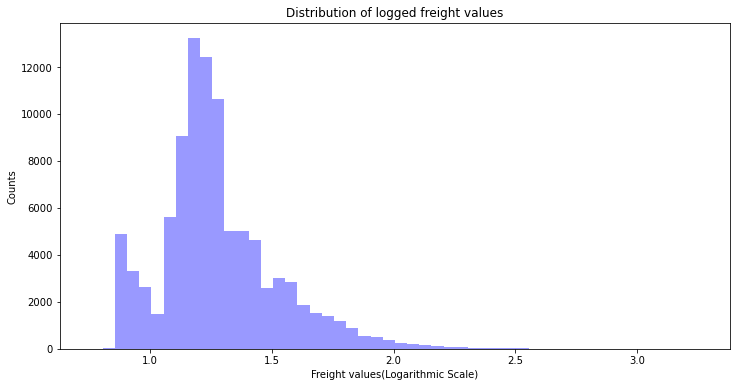

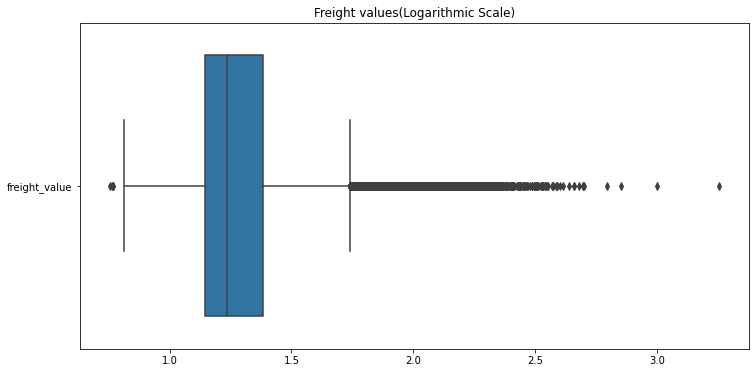

In [28]:
print(logged_freight.describe())
print("Lower quartile of price (after log transformation): R${:.2f}".format(10**np.quantile(logged_freight, 0.25)))
print("Median quartile of price (after log transformation): R${:.2f}".format(10**np.quantile(logged_freight, 0.5)))
print("Upper quartile of price (after log transformation): R${:.2f}".format(10**np.quantile(logged_freight, 0.75)))


f, axes = plt.subplots(1,1, figsize=(12, 6))
plt.title('Distribution of logged freight values')
ax = sb.distplot(logged_freight,kde=False,color='b')
ax.set(xlabel="Freight values(Logarithmic Scale)", ylabel = "Counts")



f, axes = plt.subplots(1,1, figsize=(12, 6))

ax = sb.boxplot(data=pd.DataFrame(logged_freight), orient='h')
plt.title('Freight values(Logarithmic Scale)')

After log transformation, we have a much nicer distribution. The distribution of freight is still skewed to the right by the extreme values, but much better than the one before log function. The median spend per order is R\\$17.22, and the total spending for all orders is roughly clustered between R$14 and R\\$24, with few orders having a total spend of less than R\\$2 or more than R\\$56.

### 6. Customer's location

Here I have grouped the states roughly by region.

Southeast: SP, RJ, ES, MG

Northeast: MA, PI, CE, RN, PE, PB, SE, AL, BA

North: AM, RR, AP, PA, TO, RO, AC

Midwest: MT, GO, MS, DF

South: SC, RS, PR

[Text(0.5, 0, "Customer's state"), Text(0, 0.5, 'Counts')]

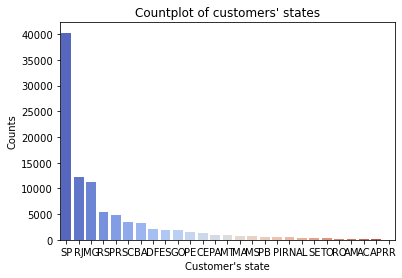

In [29]:
plt.title('Countplot of customers\' states')
ax = sb.countplot(x = 'customer_state', data = data,order = data['customer_state'].value_counts().index, palette = "coolwarm")
ax.set(xlabel="Customer's state", ylabel = "Counts")

It clearly shows that San Paulo (SP) is the state with most orders. The orders to San Paulo takes a significant portion of total orders on OList.

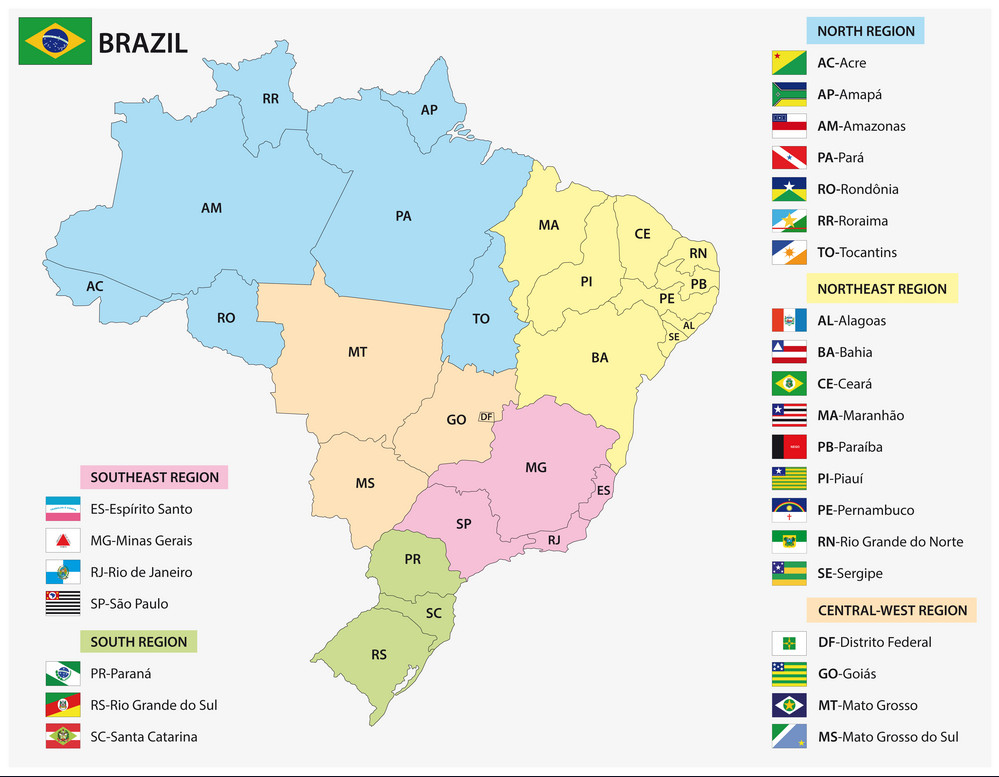
image source:https://www.vectorstock.com/royalty-free-vector/map-brazilian-states-with-flags-vector-25141189

From the map, we can see that OList is geographically limited, with few customers located in the north states and most of them gathered around the State of San Paulo (SP), for instance RJ and MG which three states dominate the customer bases.

Let go further down and investigate the purchasing power of customers of each state.

[Text(0.5, 0, "Customer's state"), Text(0, 0.5, 'Price')]

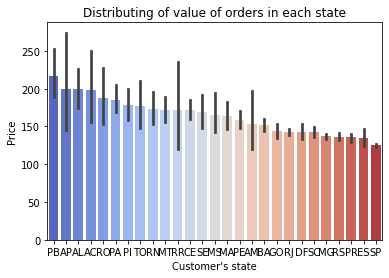

In [30]:
plt.title('Distributing of value of orders in each state')
ax = sb.barplot(x = 'customer_state',y='price',data = data, order = data.groupby('customer_state').agg({'price':'mean'}).sort_values('price',ascending = False).index, palette= "coolwarm")
ax.set(xlabel="Customer's state", ylabel = "Price")

It is observed that the prices of purchase has a certain degree of positive relationship with total sale for different states. OList can analyze the sales volume based on the customer's region and can conduct regular promotions for areas with high sales volume.

### 7. Payment type

In [31]:
payments = data.loc[:,['order_id','payment_sequential','payment_type','payment_installments','payment_value']]
payments

order_id  payment_sequential payment_type  \
0      e481f51cbdc54678b7cc49136f2d6af7                   1  credit_card   
1      53cdb2fc8bc7dce0b6741e2150273451                   1       boleto   
2      47770eb9100c2d0c44946d9cf07ec65d                   1  credit_card   
3      949d5b44dbf5de918fe9c16f97b45f8a                   1  credit_card   
4      ad21c59c0840e6cb83a9ceb5573f8159                   1  credit_card   
...                                 ...                 ...          ...   
95973  9c5dedf39a927c1b2549525ed64a053c                   1  credit_card   
95974  63943bddc261676b46f01ca7ac2f7bd8                   1  credit_card   
95975  83c1379a015df1e13d02aae0204711ab                   1  credit_card   
95976  11c177c8e97725db2631073c19f07b62                   1  credit_card   
95977  66dea50a8b16d9b4dee7af250b4be1a5                   1   debit_card   

       payment_installments  payment_value  
0                         1          18.12  
1                         1         141.46  
2                         3         179.12  
3                         1          72.20  
4                         1          28.62  
...                     ...            ...  
95973                     3          85.08  
95974                     3         195.00  
95975                     5         271.01  
95976                     4         441.16  
95977                     1          86.86  

[95978 rows x 5 columns]

In [32]:
print(payments["payment_type"].value_counts())

credit_card    72841
boleto         19090
voucher         2568
debit_card      1479
Name: payment_type, dtype: int64


[Text(0.5, 0, 'Payment Type'), Text(0, 0.5, 'Counts')]

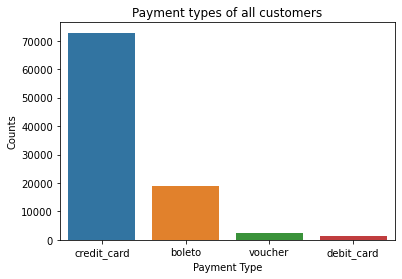

In [33]:
plt.title('Payment types of all customers')
ax = sb.countplot(x='payment_type', data=payments)
ax.set(xlabel="Payment Type", ylabel = "Counts")

In [34]:
print("percentage of credit card payment = {:.2f}%".format(100*payments["payment_type"].value_counts()[0]/payments.shape[0]))

percentage of credit card payment = 75.89%


We can observe that a large number of users (75.9%) use credit cards for payment. Olist can cooperate with credit card institutions for co-branding promotions, such as interest-free installments, to promote user spending

### 8. Customer's stickness

In [35]:
olist_orders_data= pd.read_csv('olist_orders_dataset.csv')

In [36]:
unique_order = olist_orders_data.shape[0]
unique_order

99441

In [37]:
olist_orders_data['order_id'].is_unique

True

In [38]:
olist_customers= pd.read_csv('olist_customers_dataset.csv')

In [39]:
unique_customer = olist_customers['customer_unique_id'].unique().shape[0]
unique_customer

96096

Out of 96096 of unique customers, Olist only have unique 99441 orders. This means that the vast majority of customers only place one order, indicating poor customer stickiness.

# 2. Review score analysis

### 1. The frequency for each review score

The mean review score is 4.1


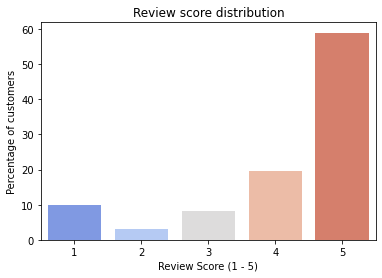

In [40]:
review_counts = data['review_score'].value_counts().to_frame().reset_index()
review_counts['score'] = review_counts['index']
review_counts['review_percentage'] = review_counts['review_score']/sum(review_counts['review_score'])*100
ax = sb.barplot(x='score',y='review_percentage',data=review_counts,palette = "coolwarm")
ax.set(xlabel="Review Score (1 - 5)", ylabel = "Percentage of customers")
plt.title('Review score distribution')
print('The mean review score is {0:.2g}'.format((np.mean(data['review_score']))))

The mean review score is about 4.1 out of 5, which is considered high. 

From the barplot, we can see that most of the customers (60%) give 5 for review. And we can also see that there are 10% of customers who give 1 for review. 

It is a reasonable and expected result as people may just express their sheer happiness or anger by the review score.

### 2. Review scores & the customer's location

Here, we are computing the average review scores of customers of each state.

In [41]:
review_score_state = data.groupby('customer_state').agg({'review_score': 'mean'}).reset_index().sort_values('review_score',ascending = False)
review_score_state

customer_state  review_score
25             SP      4.236100
17             PR      4.231993
2              AM      4.229167
3              AP      4.223881
22             RS      4.182041
10             MG      4.181987
20             RO      4.175000
26             TO      4.165441
11             MS      4.153295
12             MT      4.135074
19             RN      4.129237
6              DF      4.129173
23             SC      4.119830
0              AC      4.113924
8              GO      4.087873
15             PE      4.068640
14             PB      4.060078
7              ES      4.048265
16             PI      3.976842
18             RJ      3.948718
5              CE      3.940392
4              BA      3.911810
21             RR      3.902439
13             PA      3.892439
24             SE      3.891566
1              AL      3.843038
9              MA      3.805907

At this rate, we can assume that the number of high orders in SP correspond to the customer satisfaction in that state. Let's try to plot this!

[Text(0.5, 0, 'Customer States'), Text(0, 0.5, 'Review Score (1 - 5)')]

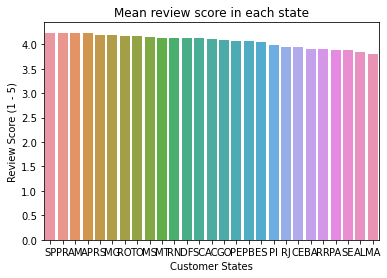

<Figure size 4032x4032 with 0 Axes>

In [42]:
plt.title('Mean review score in each state')
ax = sb.barplot(x='customer_state',y='review_score',data=review_score_state)
plt.figure(figsize=(56,56))
ax.set(xlabel="Customer States", ylabel = "Review Score (1 - 5)")

From this barplot and the table above, we can see that most states are equally satisfied with the orders, giving the fact that average review score ranges marginally from 4.24 to 3.80.

It is observed that southeast region states (SP) and south region states (PR, RS) generally has higher review score than other states,/

### 3. Relationship between duration between order and delivery and review score

From the consumer's point of view, the longer you wait, the lower your satisfaction may be, so look at the distribution of satisfaction and delivery time

In [43]:
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['review_creation_date'] = pd.to_datetime(data['review_creation_date'])
data['review_answer_timestamp'] = pd.to_datetime(data['review_answer_timestamp'])
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

data['real_delivery_time'] = (data['order_delivered_customer_date']-data['order_approved_at']).dt.days.astype('timedelta64[D]')
data['real_delivery_time'] = (data['real_delivery_time']/np.timedelta64(1, 'D')).astype(int)

[Text(0.5, 0, 'Delivery time'), Text(0, 0.5, 'Duration')]

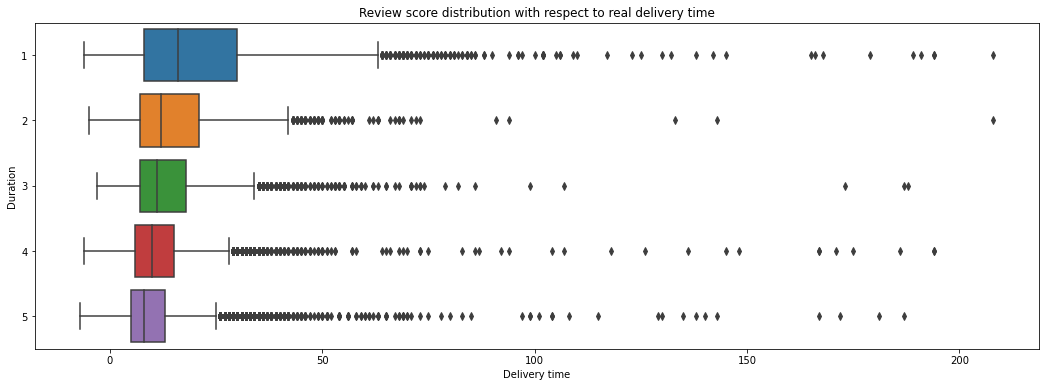

In [44]:
plt.figure(figsize=(18,6))
plt.title('Review score distribution with respect to real delivery time')
ax = sb.boxplot(x = 'real_delivery_time', y = "review_score", data = data, orient = "h")
ax.set(xlabel="Delivery time", ylabel = "Duration")

It is quite obvious and intuitive that as satisfaction increases, the delivery time becomes shorter and more concentrated. Therefore, we can tentatively conclude that if Olist want to improve consumer satisfaction, accelerating the delivery time is a good way.

# 3. A deeper analysis on review scores based on key features

To analyse reviews, we need to create new features to help us analyse the review score, including estimated delivery time, real delivery time, delay, and review before delivery.

Now we change the columns with date and time to the date-time pandas object.

In [45]:
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['review_creation_date'] = pd.to_datetime(data['review_creation_date'])
data['review_answer_timestamp'] = pd.to_datetime(data['review_answer_timestamp'])
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

Here, we are introducing some new features derived from the original datasets

    The estimated delivery time
    The actual delivery time
    The delay time (0 if arrived on time)
    A binary for review received before delivery. (= 1 if reviewed before the delivery reached, else = 0)
    A binary for lateness. (=1 if the delivery is not on time, else = 0)
    And lastly, the freight ratio. We define freight ratio as  = freight_value/payment_value

In [46]:
data['estimated_delivery_time'] = (data['order_estimated_delivery_date']-data['order_approved_at']).dt.days.astype('timedelta64[D]')
data['real_delivery_time'] = (data['order_delivered_customer_date']-data['order_approved_at']).dt.days.astype('timedelta64[D]')
data['delay'] = (data['order_delivered_customer_date']-data['order_estimated_delivery_date']).dt.days.astype('timedelta64[D]')
data['review_before_delivery'] = (data['order_delivered_customer_date']-data['review_answer_timestamp']).dt.days.astype('timedelta64[D]')

#freight rate
data['freight_ratio'] = data['freight_value']/data['price']

Converting the time to the same unit - days.

In [47]:
data['estimated_delivery_time'] = (data['estimated_delivery_time']/np.timedelta64(1, 'D')).astype(int)
data['real_delivery_time'] = (data['real_delivery_time']/np.timedelta64(1, 'D')).astype(int)
data['delay'] = (data['delay']/np.timedelta64(1, 'D')).astype(int)
data['review_before_delivery'] = (data['review_before_delivery']/np.timedelta64(1, 'D')).astype(int)

In [48]:
data['delay'] = data['delay'].apply(lambda x: x if x>0 else 0)
data['review_before_delivery'] = data['review_before_delivery'].apply(lambda x: 1 if x>0 else 0)
data['late'] = data['delay'].apply(lambda x: 1 if x>0 else 0)

So let's make use of our created feature.

Firstly, Let us look at review survey fulfilled before delivery

[Text(0.5, 0, 'Review before delivery (1 = Yes, 0 = No)'),
 Text(0, 0.5, 'Counts')]

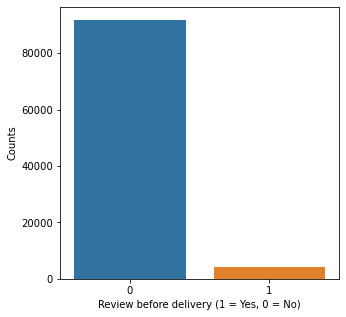

In [49]:
plt.figure(figsize=(5,5))
ax = sb.countplot(x='review_before_delivery', data = data)
ax.set(xlabel="Review before delivery (1 = Yes, 0 = No)", ylabel = "Counts")

It is observed that most customers are reasonable in giving the reviews after receiving the goods.

Moving on, let's see how the delay is distributed via a boxplot

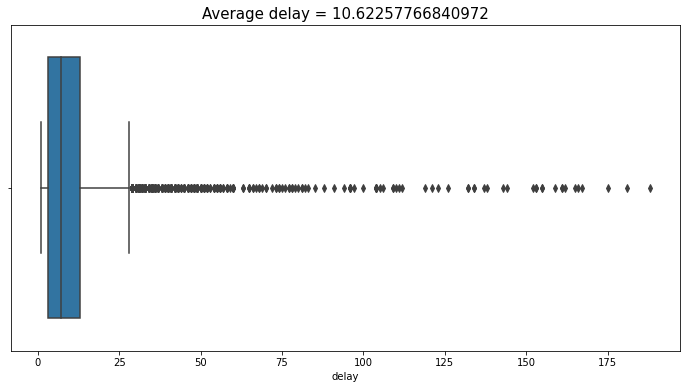

In [50]:
f, axes = plt.subplots(1,1, figsize=(12, 6))

late_d = data[data['delay']>0]
ax = sb.boxplot(x='delay', data=late_d, orient='h')
plt.title('Late deliveries Delays (days)')
title = 'Average delay = {}'.format(np.mean(late_d['delay']))
plt.title(title, size = 15);
plt.savefig('delay_distr.eps')
plt.show()

Let's do a distribution of real and estimated delivery times

C:\Users\Juan Samuel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juan Samuel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


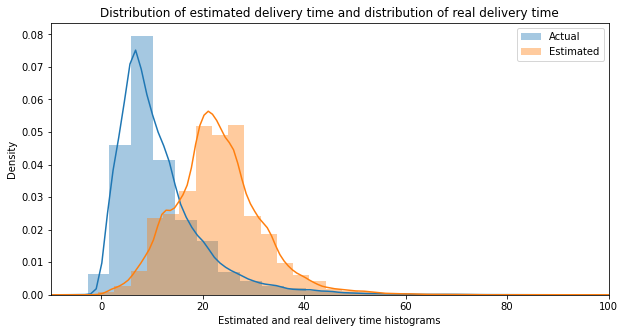

In [51]:
plt.figure(figsize=(10,5))
sb.distplot(data['real_delivery_time'],label='Actual')
sb.distplot(data['estimated_delivery_time'],label='Estimated')
plt.title('Distribution of estimated delivery time and distribution of real delivery time')
plt.xlim([-10,100])
plt.xlabel('Estimated and real delivery time histograms')
plt.legend()

From the graph, we can see that the distribution of actual delivery time are at the left of that of the estimated time, indicating that most of the time, the actual delivery time was faster than the estimated delivery time. It may be one of the main factor contributing to the high rating given by consumers, but let's continue the analysis.

<AxesSubplot:xlabel='late', ylabel='count'>

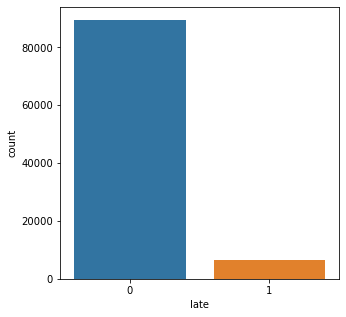

In [52]:
#late frequency
plt.figure(figsize=(5,5))
sb.countplot(x='late', data = data)

In [53]:
print('Late delivery probability =  {}'.format(np.mean(data['late'])))

Late delivery probability =  0.06774469149180021


From the graph, the number of late deliveries is far smaller to the one which is not, and the probablity of having a late delivery is only 6.77% which is considered quite small. 

It might be the reason for having a general well review score for Olist.

But let's take a deeper look into the late deliveries by looking the delay feature which we have created before

In [54]:
total_delay = data[data['delay']>0].delay.sum()
numbers_of_delay = data[data['delay']>0].delay.count()
average_delay= total_delay/numbers_of_delay
print("The average delay of the deliveries is {0:.5g} minutes".format(average_delay))

The average delay of the deliveries is 10.623 minutes


An approximately 11-minute average delay is quite heavy. It might be one of the factor of consumers giving low scores. Let's now see the average delay in different places.

In [55]:
late_data_state= data.groupby('customer_state').agg({'late':'mean'}).sort_values('late',ascending=False)
late_data_state.reset_index()
late_data_state = late_data_state.merge(review_score_state,on='customer_state')
late_data_state = late_data_state.set_index('customer_state').sort_values('late',ascending=True)
late_data_state

late  review_score
customer_state                        
AM              0.027778      4.229167
RO              0.029167      4.175000
AP              0.029851      4.223881
AC              0.037975      4.113924
PR              0.040196      4.231993
SP              0.044927      4.236100
MG              0.045873      4.181987
DF              0.056604      4.129173
MT              0.060159      4.135074
RS              0.060617      4.182041
GO              0.065262      4.087873
SC              0.081586      4.119830
RN              0.093220      4.129237
PE              0.096348      4.068640
MS              0.097421      4.153295
TO              0.099265      4.165441
PB              0.104651      4.060078
ES              0.107089      4.048265
PA              0.111821      3.892439
RJ              0.121286      3.948718
BA              0.121492      3.911810
RR              0.121951      3.902439
PI              0.136842      3.976842
CE              0.138039      3.940392
SE              0.153614      3.891566
MA              0.175809      3.805907
AL              0.212658      3.843038

As we can see from the table, we can observe an inverse relationship between the late frequency and the average review score of each state.

We decide to investigate this further via visualization.

[Text(0.5, 0, 'Customer  State'), Text(0, 0.5, 'Late probability')]

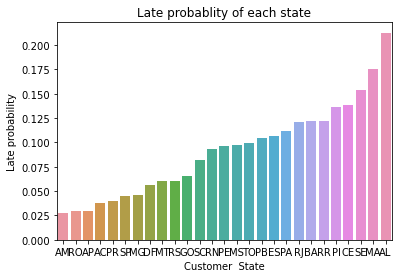

In [56]:
ax = sb.barplot(x = late_data_state.index, y='late', data = late_data_state)
plt.title('Late probablity of each state')
ax.set(xlabel="Customer  State", ylabel = "Late probability")

Now, let's see the correlation between this late frequency with the review score

In [57]:
state_late_delivery_freq = data.groupby('customer_state').agg({'late':'mean'}).reset_index()
state_review_score       = data.groupby('customer_state').agg({'review_score':'mean'}).reset_index()
corr = np.corrcoef(state_late_delivery_freq['late'],state_review_score['review_score'])[0,1]
print("The coefficient between the state review score and late rate:\t",corr)

The coefficient between the state review score and late rate:	 -0.894239608845938


-0.894. What a high correlation! Lets see the scatter diagram of review score by states.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


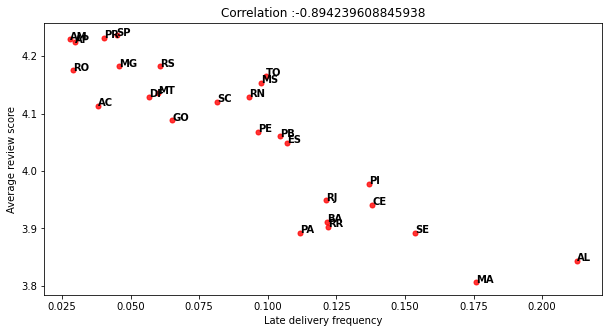

In [58]:
state_review = state_late_delivery_freq.merge(state_review_score, how = 'inner', on = 'customer_state')

plt.figure(figsize=(10,5))
p1 = sb.regplot(x='late',y='review_score',data = state_review, color="r", marker=".",scatter_kws={'s':100},fit_reg=False)

for line in range(0,state_review.shape[0]):
     p1.text(state_review.late[line], state_review.review_score[line], state_review.customer_state[line], 
             horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Correlation :{0}'.format(corr), size = 12)
plt.xlabel('Late delivery frequency')
plt.ylabel('Average review score')
plt.savefig('regression_late_review.eps')

From the numeric value of correaltion and the scatter plot, it shows that when the late rate are low, people will most likely give a high rate score.

From such an ideal result, we decide to investigate further!

Let us filter out those orders that are not delivered so we can do a better analysis on review scores to find out about customer satisfaction.

# 4. Machine Learning(random forest): Further down to review score on delivered orders

In [59]:
delivered = data[data['order_status']=='delivered']

In [60]:
delivered.shape

(95972, 42)

[Text(0.5, 0, 'Product category'), Text(0, 0.5, 'Review scores')]

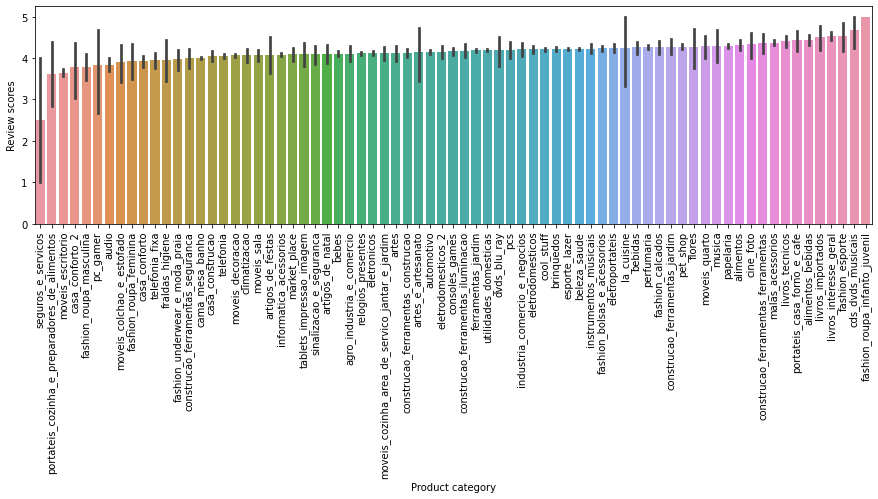

In [61]:
plt.figure(figsize=(15,4))

ax = sb.barplot(x = 'product_category_name',y='review_score',data=delivered,
            order = delivered.groupby('product_category_name').agg({'review_score':'mean'}).sort_values('review_score').index)
plt.xticks(rotation =90)
ax.set(xlabel="Product category", ylabel = "Review scores")

From the above diagram, we observe that 'fashion roupa infanto juvenil' which is fashion juvenile/infant clothing get favoured the most by customers on Olist with an exceptionally high review score of almost 5.

Also we observe that 'seguros e servicos' which is insurance services get disliked the most, with an average review score of only 2.5.

Now let us set up a new DataFrame, clear, with only the features that we would like to explore further on and with na dropped.

In [62]:
clear = delivered.drop(columns=['order_id','customer_id','order_status','order_purchase_timestamp','order_approved_at', 'product_category_name','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','payment_sequential','payment_type','payment_installments','customer_unique_id','customer_zip_code_prefix','customer_city','customer_state','review_id','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp','shipping_limit_date','seller_id','product_id','product_name_lenght','product_height_cm','product_width_cm','product_weight_g','product_length_cm'])
clear.dropna(how='any',inplace=True)
clear

payment_value  review_score  order_item_id   price  freight_value  \
0              18.12             4              1   29.99           8.72   
1             141.46             4              1  118.70          22.76   
2             179.12             5              1  159.90          19.22   
3              72.20             5              1   45.00          27.20   
4              28.62             5              1   19.90           8.72   
...              ...           ...            ...     ...            ...   
95973          85.08             5              1   72.00          13.08   
95974         195.00             4              1  174.90          20.10   
95975         271.01             5              1  205.99          65.02   
95976         441.16             2              2  359.98          81.18   
95977          86.86             5              1   68.50          18.36   

       product_description_lenght  product_photos_qty  real_delivery_time  \
0                           268.0                 4.0                   8   
1                           178.0                 1.0                  12   
2                           232.0                 1.0                   9   
3                           468.0                 3.0                  13   
4                           316.0                 4.0                   2   
...                           ...                 ...                 ...   
95973                      1517.0                 1.0                   8   
95974                       828.0                 4.0                  22   
95975                       500.0                 2.0                  24   
95976                      1893.0                 1.0                  17   
95977                       569.0                 1.0                   7   

       estimated_delivery_time  delay  review_before_delivery  freight_ratio  \
0                           15      0                       0       0.290764   
1                           17      0                       0       0.191744   
2                           26      0                       0       0.120200   
3                           26      0                       0       0.604444   
4                           12      0                       0       0.438191   
...                        ...    ...                     ...            ...   
95973                       18      0                       0       0.181667   
95974                       23      0                       0       0.114923   
95975                       30      0                       0       0.315646   
95976                       37      0                       0       0.225513   
95977                       24      0                       0       0.268029   

       late  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
95973     0  
95974     0  
95975     0  
95976     0  
95977     0  

[94620 rows x 13 columns]

We are trying to build a model of random forest on review scores.

To make this possible, we need to create a binary values on review scores. We decide to replace review scores of value 4 and 5 to be binary value 1 and review score of 1 to be binary value 0 as we need to focus on analysing those extremely good and extremly bad comments. We choose to ignore 2 and 3 because they are relatively neutral and they are of small quantities out of all reviews.

In [63]:
def bin_score_cal(x):
    if x==1:
        return 0
    elif x ==5 or x==4:
        return 1
    else:
        return None

In [64]:
clear['bin_score'] = clear['review_score'].apply(bin_score_cal)

In [65]:
clear

payment_value  review_score  order_item_id   price  freight_value  \
0              18.12             4              1   29.99           8.72   
1             141.46             4              1  118.70          22.76   
2             179.12             5              1  159.90          19.22   
3              72.20             5              1   45.00          27.20   
4              28.62             5              1   19.90           8.72   
...              ...           ...            ...     ...            ...   
95973          85.08             5              1   72.00          13.08   
95974         195.00             4              1  174.90          20.10   
95975         271.01             5              1  205.99          65.02   
95976         441.16             2              2  359.98          81.18   
95977          86.86             5              1   68.50          18.36   

       product_description_lenght  product_photos_qty  real_delivery_time  \
0                           268.0                 4.0                   8   
1                           178.0                 1.0                  12   
2                           232.0                 1.0                   9   
3                           468.0                 3.0                  13   
4                           316.0                 4.0                   2   
...                           ...                 ...                 ...   
95973                      1517.0                 1.0                   8   
95974                       828.0                 4.0                  22   
95975                       500.0                 2.0                  24   
95976                      1893.0                 1.0                  17   
95977                       569.0                 1.0                   7   

       estimated_delivery_time  delay  review_before_delivery  freight_ratio  \
0                           15      0                       0       0.290764   
1                           17      0                       0       0.191744   
2                           26      0                       0       0.120200   
3                           26      0                       0       0.604444   
4                           12      0                       0       0.438191   
...                        ...    ...                     ...            ...   
95973                       18      0                       0       0.181667   
95974                       23      0                       0       0.114923   
95975                       30      0                       0       0.315646   
95976                       37      0                       0       0.225513   
95977                       24      0                       0       0.268029   

       late  bin_score  
0         0        1.0  
1         0        1.0  
2         0        1.0  
3         0        1.0  
4         0        1.0  
...     ...        ...  
95973     0        1.0  
95974     0        1.0  
95975     0        1.0  
95976     0        NaN  
95977     0        1.0  

[94620 rows x 14 columns]

In [66]:
clear.shape

(94620, 14)

In [67]:
clear.dropna(inplace=True)

In [68]:
clear.shape

(83824, 14)

In [69]:
clear= clear[clear['real_delivery_time']>0] # filter out wrong data (negative real delivery time)
clear = clear[clear['estimated_delivery_time']>0] # filter out wrong data (negative estimated delivery time)
clear.describe()

payment_value  review_score  order_item_id         price  \
count   83609.000000  83609.000000   83609.000000  83609.000000   
mean      158.126888      4.328446       1.136277    138.055387   
std       220.072761      1.252944       0.530043    212.621948   
min         0.010000      1.000000       1.000000      0.850000   
25%        60.100000      4.000000       1.000000     45.950000   
50%       103.140000      5.000000       1.000000     86.900000   
75%       175.160000      5.000000       1.000000    149.900000   
max     13664.080000      5.000000      21.000000  13440.000000   

       freight_value  product_description_lenght  product_photos_qty  \
count   83609.000000                83609.000000        83609.000000   
mean       22.661334                  798.025260            2.252820   
std        21.374580                  657.091826            1.747286   
min         0.000000                    4.000000            1.000000   
25%        13.800000                  352.000000            1.000000   
50%        17.160000                  610.000000            2.000000   
75%        23.880000                  999.000000            3.000000   
max      1794.960000                 3992.000000           20.000000   

       real_delivery_time  estimated_delivery_time         delay  \
count        83609.000000             83609.000000  83609.000000   
mean            11.359758                22.799854      0.669186   
std              9.304195                 8.761077      4.549756   
min              1.000000                 1.000000      0.000000   
25%              6.000000                17.000000      0.000000   
50%              9.000000                22.000000      0.000000   
75%             14.000000                28.000000      0.000000   
max            208.000000               149.000000    181.000000   

       review_before_delivery  freight_ratio          late     bin_score  
count            83609.000000   83609.000000  83609.000000  83609.000000  
mean                 0.040414       0.306305      0.061524      0.887560  
std                  0.196930       0.311594      0.240291      0.315909  
min                  0.000000       0.000000      0.000000      0.000000  
25%                  0.000000       0.131591      0.000000      1.000000  
50%                  0.000000       0.224037      0.000000      1.000000  
75%                  0.000000       0.378005      0.000000      1.000000  
max                  1.000000      21.447059      1.000000      1.000000

In [70]:
correlation = clear.apply(lambda x: pd.factorize(x)[0]).corr()
correlation

payment_value  review_score  order_item_id  \
payment_value                    1.000000      0.032472       0.149276   
review_score                     0.032472      1.000000       0.085397   
order_item_id                    0.149276      0.085397       1.000000   
price                            0.365227      0.045228       0.278566   
freight_value                    0.412932      0.045579       0.275563   
product_description_lenght       0.147067      0.007312       0.007323   
product_photos_qty              -0.031382     -0.013339      -0.029821   
real_delivery_time               0.026134      0.179972      -0.014305   
estimated_delivery_time          0.036393     -0.002528       0.004919   
delay                            0.010478      0.243364      -0.011258   
review_before_delivery           0.003579      0.327964      -0.014628   
freight_ratio                    0.693285      0.025464       0.078710   
late                             0.005686      0.296489      -0.011960   
bin_score                        0.034450      0.695533       0.128146   

                               price  freight_value  \
payment_value               0.365227       0.412932   
review_score                0.045228       0.045579   
order_item_id               0.278566       0.275563   
price                       1.000000       0.245577   
freight_value               0.245577       1.000000   
product_description_lenght  0.123565       0.089554   
product_photos_qty         -0.047734      -0.007698   
real_delivery_time          0.002562       0.058083   
estimated_delivery_time     0.012803       0.046120   
delay                       0.004295       0.018203   
review_before_delivery      0.001604       0.017774   
freight_ratio               0.399707       0.383266   
late                        0.001037       0.023190   
bin_score                   0.059318       0.071135   

                            product_description_lenght  product_photos_qty  \
payment_value                                 0.147067           -0.031382   
review_score                                  0.007312           -0.013339   
order_item_id                                 0.007323           -0.029821   
price                                         0.123565           -0.047734   
freight_value                                 0.089554           -0.007698   
product_description_lenght                    1.000000            0.019507   
product_photos_qty                            0.019507            1.000000   
real_delivery_time                            0.003490           -0.008495   
estimated_delivery_time                       0.018123           -0.007494   
delay                                         0.005698           -0.006352   
review_before_delivery                       -0.004673           -0.008519   
freight_ratio                                 0.156505           -0.031153   
late                                         -0.003654           -0.004212   
bin_score                                     0.002354           -0.015137   

                            real_delivery_time  estimated_delivery_time  \
payment_value                         0.026134                 0.036393   
review_score                          0.179972                -0.002528   
order_item_id                        -0.014305                 0.004919   
price                                 0.002562                 0.012803   
freight_value                         0.058083                 0.046120   
product_description_lenght            0.003490                 0.018123   
product_photos_qty                   -0.008495                -0.007494   
real_delivery_time                    1.000000                 0.046447   
estimated_delivery_time               0.046447                 1.000000   
delay                                 0.553751                -0.013803   
review_before_delivery                0.516629                -0.017336   
freight_ratio       

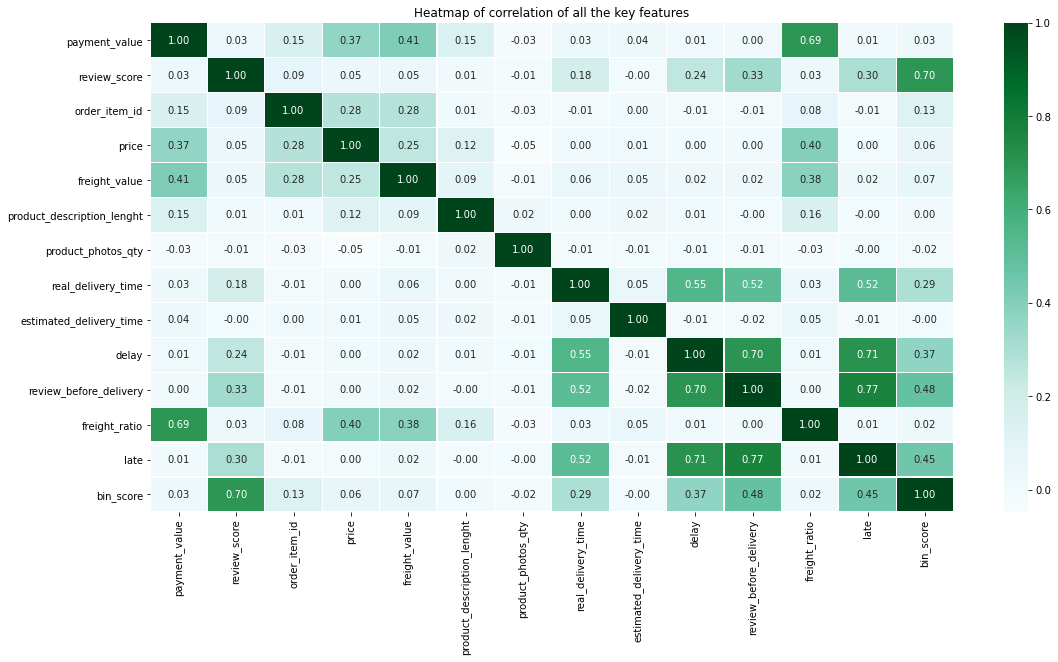

In [71]:
plt.figure(figsize=(18, 9))
plt.title('Heatmap of correlation of all the key features')
ax = sb.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, 
                linewidths=.1,annot = True, fmt=".2f",cmap = "BuGn")

In [72]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [73]:
features = clear.drop(columns=['review_score','bin_score']) # dropping the scores in features, so as not to affect further result
labels = np.array(clear['bin_score'])
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 2522)

In [74]:
pd.Series(train_labels).value_counts()

1.0    55594
0.0     7112
dtype: int64

To enhance the model built, we decide to do undersampling of train datasets to compenseate and adjust the imbalance in class distribution of the data set.

In [75]:
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# resample using undersample
sampler = RandomUnderSampler(random_state=2522,replacement=True)
X_rs, y_rs = sampler.fit_resample(train_features, train_labels)

In [ ]:
# applying random forest on the resampled datasets
random1 = RandomForestClassifier(n_estimators=40)
random1.fit(X_rs,y_rs)
prediction1 = random1.predict(test_features)

In [ ]:
def accuracy_measures(train,predict):
    TP = confusion_matrix(train, predict)[1][1]
    TN = confusion_matrix(train, predict)[0][0]
    FP = confusion_matrix(train, predict)[0][1]
    FN = confusion_matrix(train, predict)[1][0]
    print('True Positive Rate =',TP/(TP+FN))
    print('True Negative Rate =',TN/(TN+FP))
    print('False Positive Rate =',FP/(FP+TN))
    print('False Negative Rate =',FN/(FN+TP))

    
accuracy_measures(train_labels, random1.predict(train_features))

In [ ]:
plt.figure(figsize=(9,9))
plt.title('Heatmap of confusion matrix on train dataset')
ax = sb.heatmap(confusion_matrix(train_labels, random1.predict(train_features)), annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
ax.set(xlabel="Actual", ylabel = "Predict")
print('Classification Accuracy on train: %.3f' % random1.score(train_features,train_labels))

The model has fits the train data well, with a very high True Postive and True Negative rate and a pretty decent classification accuracy score of 0.824.

In [ ]:
def accuracy_measures(train,predict):
    TP = confusion_matrix(train, predict)[1][1]
    TN = confusion_matrix(train, predict)[0][0]
    FP = confusion_matrix(train, predict)[0][1]
    FN = confusion_matrix(train, predict)[1][0]
    print('True Positive Rate =',TP/(TP+FN))
    print('True Negative Rate =',TN/(TN+FP))
    print('False Positive Rate =',FP/(FP+TN))
    print('False Negative Rate =',FN/(FN+TP))

    
accuracy_measures(test_labels, prediction1)

In [ ]:
plt.figure(figsize=(9,9))
plt.title('Heatmap of confusion matrix on test dataset')
ax = sb.heatmap(confusion_matrix(test_labels, prediction1), annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
ax.set(xlabel="Actual", ylabel = "Predict")
print('Classification Accuracy on test: %.3f' %random1.score(test_features,test_labels))

The accuracy score on the test data is not bad - 0.762.

Now we are to calculate the relative importance of each feature based on our model of random forest.

In [ ]:
feature_list = clear.drop(columns=['review_score','bin_score']).columns
feature_importances_random1 = pd.DataFrame(random1.feature_importances_, index =  feature_list, columns=['importance']).sort_values('importance', ascending=False)
feature_importances_random1['importance'] /= np.max(feature_importances_random1['importance']) # calculate the relative importance w.r.t to the most important feature
feature_importances_random1

In [ ]:
plt.figure(figsize = (3,10))

ax = sb.barplot(y = feature_importances_random1.index, x = feature_importances_random1.importance, data = feature_importances_random1,palette = "rocket")
ax.set(xlabel="Relative Importance", ylabel = "Features")

We observe that real delivery time is the most crucial feature in determining the review scores given by customers. Also, the relative importances of product description length and and freight value are also high (very close to 1), suggesting their significances in affecting the review scores. We also see that features like if the review is done before the delivery has the least impact on the review score, with a relative importance of only 0.295. This makes sense as it would not be an accurate review if the review is done before receiving the goods.

# 5. Looking into important features - freight values and real delivery time

### 1. Freight values and weight and volume of the packages

In [ ]:
np.mean(data['freight_value'])

In [ ]:
np.mean(data['product_weight_g'])

In [ ]:
f = plt.figure(figsize=(16, 8))
plt.scatter(data['freight_value'], data['product_weight_g'])
plt.ylabel('Weight(g)')
plt.xlabel("Freight values")
plt.show()

We cannot see a direct relationship between freight value and product weight from the above scatter plot due to the extreme freight values. Hence, let's twist the model a little bit using log.

In [ ]:
data_non_zero = data[data['product_weight_g']>=0]
data_non_zero = data[data['freight_value']!=0]

In [ ]:
sqrt_weight = data_non_zero['product_weight_g'].apply(math.sqrt)
log_freight = data_non_zero['freight_value'].apply(log_10)

In [ ]:
f = plt.figure(figsize=(16, 8))
plt.scatter(log_freight, sqrt_weight)
plt.ylabel('Square root of Weight(g)')
plt.xlabel("Logged Freight values")
plt.show()

In [ ]:
weight_and_freight = pd.DataFrame([sqrt_weight,log_freight]).transpose()
weight_and_freight.head()

In [ ]:
weight_and_freight.corr()

After converting weight and shipping cost, R-square reaches 0.515, which means that 51% of the change in log(shipping cost) can be explained by sqrt(weight), and r(correlation coefficient) is 0.72(sqrt(0.515)=0.72), which means that there is a positive correlation between weight and shipping cost, in other words, the heavier the sqrt(weight) the higher the average of log(shipping cost), which is very intuitive.

In [ ]:
data['volume'] = data['product_length_cm']*data['product_height_cm']*data['product_width_cm']

In [ ]:
data_non_zero_2 = data[data['freight_value']!=0]
vlm = data_non_zero_2['volume']
log_freight_2 = data_non_zero_2['freight_value'].apply(log_10)

In [ ]:
f = plt.figure(figsize=(16, 8))
plt.scatter(log_freight_2, vlm)
plt.ylabel('Volume(cm^3)')
plt.xlabel("Logged Freight values")
plt.show()

In [ ]:
vlm_and_freight = pd.DataFrame([vlm,log_freight_2]).transpose()
vlm_and_freight.head()

In [ ]:
vlm_and_freight.corr()

Similarly, after taking the logarithm of the shipping cost, we can also see that when the volume of material rises, the average of log(shipping cost) will also rise with it (also known from r=0.68 (0.68=sqrt(0.458377)) )

From the above analysis, we can see that there is a positive correlation between the freight cost and the volume and weight of the package. There is also a postive relationship with the geographical location where the populous, developed, accessible area with better transportation gets a lower average freight value. But we also need to note that there may be a linearity between weight and volume (generally speaking, the larger the volume, the heavier the weight)

### 2. Delivery time and Frieght values with geographical location

In [ ]:
plt.title('Barplot of delivery time with geographical location')
ax = sb.barplot(x = 'customer_state',y='real_delivery_time',data = data, order = data.groupby('customer_state').agg({'real_delivery_time':'mean'}).sort_values('real_delivery_time',ascending = False).index, palette= "coolwarm")
ax.set(xlabel="Customer's state", ylabel = "Delivery Time (Days)")

In [ ]:
plt.title('Barplot of delivery time with geographical location')
ax = sb.barplot(x = 'customer_state',y='freight_value',data = data, order = data.groupby('customer_state').agg({'freight_value':'mean'}).sort_values('freight_value',ascending = False).index, palette= "coolwarm")
ax.set(xlabel="Customer's state", ylabel = "Delivery Time (Days)")

We can see that southeast region(SP, MG, RJ, ES) and south region (PR, SC, RS) has significantly lower average real delivery time and significantly lower freight value than northeast region states (PB,PI) and north region states(RR, RO, AC). This could be attributed to Brazil's geographical location where Amazon Rainforest is located in the North which reduces the ease of transportation and accessbility, therefore raising the freight. They are also located farther from the populous area in the southeast and south, where online retailers are more likely to be concentrated at.

This could be the reason why southeast region and south region states have higher average review scores than other states,